# Hate Speech Detector 2.0
---
**Statistical data analysis** - predicted hate speech
1. Yearly counts analysis (pie plot)
2. Monthly, weekdaily and hourly count analysis. (bar plot)
3. Timeline tweet counts analysis. (line plot)
4. Monthly tweet counts analysis. (line plot)
5. Hate speech types analysis:
    1. Monthly, weekdaily and hourly count analysis of certain hate type analysis. (bar plot)
    2. Timeline tweet counts of certain hate type analysis. (line plot)
6. Tweets of certain hate type popularity - 8 histograms of following popularity measures (7 for each hate type and one for non-hate tweets)
    1. Like counts
    2. Retweet counts
    3. Reply counts
7. Data quantitive year-monthly analysis. (line plot)
8. All tweet word counts analysis.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime

from src.dataframes.utils import combine_row_wisely
from src.dataframes.timeline import get_stats, get_monthly_stats, empty_date_intervals, monthly_word_counts
from src.visualization.stats import (tweet_yearly_counts_pie, tweet_count_bars, tweets_timeline,
                                     monthly_hateful_amount_lines, monthly_amount_line, popularity_hists,
                                     monthly_word_count_line)
from src.constants import (ALL_SANITIZED_PATH, PREDICTION_RESULTS_DIR,
                           MONTH_NAMES, WEEKDAY_NAMES,
                           SSA_CHART_DIR)

In [2]:
pd.set_option('display.max_colwidth', 400)

In [3]:
plt.style.use('ggplot')

## Data loading
---

In [4]:
df_sanitized = pd.read_csv(ALL_SANITIZED_PATH)
df_sanitized.head(2)

/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,2,5,6,9,11,12,23,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,language,thumbnail
0,0,"4,74799273478226E+017",1402035942000,2014-06-06,08:25:42,CEST,2472598111,74mvhone,R8,NaN,...,NaN,NaN,NaN,"[{'user_id': '2472598111', 'username': '74MVHONE'}]",NaN,NaN,NaN,NaN,NaN,NaN
1,1,"4,74818190787093E+017",1402040453000,2014-06-06,09:40:53,CEST,549513785,stanislawiskra,Stanisław Iskra,NaN,...,NaN,NaN,NaN,"[{'user_id': '549513785', 'username': 'StanislawIskra'}]",NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_predicted_rnn = pd.read_csv(PREDICTION_RESULTS_DIR.replace('{}', 'predictions_RNN'))
df_predicted_rnn.head(2)

,wyzywanie,grożenie,wykluczanie,odczłowieczanie,poniżanie,stygmatyzacja,szantaż
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_combined = combine_row_wisely([df_sanitized, df_predicted_rnn.astype(int)])
df_combined.head(2)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,trans_dest,language,thumbnail,wyzywanie,grożenie,wykluczanie,odczłowieczanie,poniżanie,stygmatyzacja,szantaż
0,0,"4,74799273478226E+017",1402035942000,2014-06-06,08:25:42,CEST,2472598111,74mvhone,R8,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,1,"4,74818190787093E+017",1402040453000,2014-06-06,09:40:53,CEST,549513785,stanislawiskra,Stanisław Iskra,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [7]:
dates = df_combined['date'].values
dates

array(['2014-06-06', '2014-06-06', '2014-06-06', ..., '2020-05-16',
       '2020-05-16', '2020-05-16'], dtype=object)

In [8]:
times = df_combined['time'].values
times

array(['08:25:42', '09:40:53', '09:48:23', ..., '23:52:46', '23:52:56',
       '23:53:33'], dtype=object)

In [9]:
years = np.array([int(d.split('-')[0]) for d in dates])
years

array([2014, 2014, 2014, ..., 2020, 2020, 2020])

In [10]:
months = np.array([int(d.split('-')[1]) for d in dates])
months

array([6, 6, 6, ..., 5, 5, 5])

In [11]:
weekdays = np.array([datetime.strptime(d, '%Y-%m-%d').weekday() for d in dates])
weekdays

array([4, 4, 4, ..., 5, 5, 5])

In [12]:
hours = np.array([int(t.split(':')[0]) for t in times])
hours

array([ 8,  9,  9, ..., 23, 23, 23])

In [13]:
df_yc, df_mc, df_wdc, df_hc, df_dc = get_stats(df_combined,
                                               month_names=MONTH_NAMES,
                                               weekday_names=WEEKDAY_NAMES)

## Yearly counts analysis
---

In [14]:
df_yc

,all,count
year,,
2014,2708,2708
2015,7674,7674
2016,12402,12402
2017,53229,53229
2018,52969,52969
2019,65779,65779
2020,34632,34632


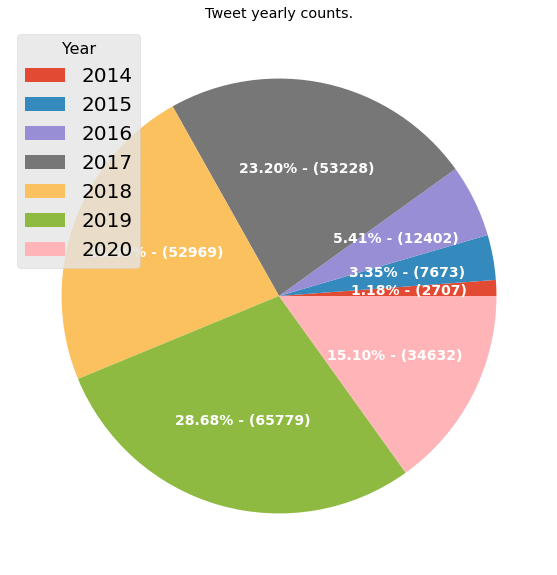

In [15]:
tweet_yearly_counts_pie(df_yc, save_file=SSA_CHART_DIR.replace('{}', 'tweet_yearly_counts_pie'))

## Monthly, weekdaily, hourly counts
---

In [16]:
df_mc

,all,count
month,,
January,24087,24087
February,19211,19211
March,16509,16509
April,15015,15015
May,13403,13403
June,11807,11807
July,29125,29125
August,16148,16148
September,17782,17782


In [17]:
df_wdc

,all,count
weekday,,
Monday,30371,30371
Tuesday,35317,35317
Wednesday,38054,38054
Thursday,37670,37670
Friday,34511,34511
Saturday,27120,27120
Sunday,26350,26350


In [18]:
df_hc

,all,count
hour,,
0,5363,5363
1,2585,2585
2,1375,1375
3,832,832
4,793,793
5,1228,1228
6,2953,2953
7,6233,6233
8,9922,9922


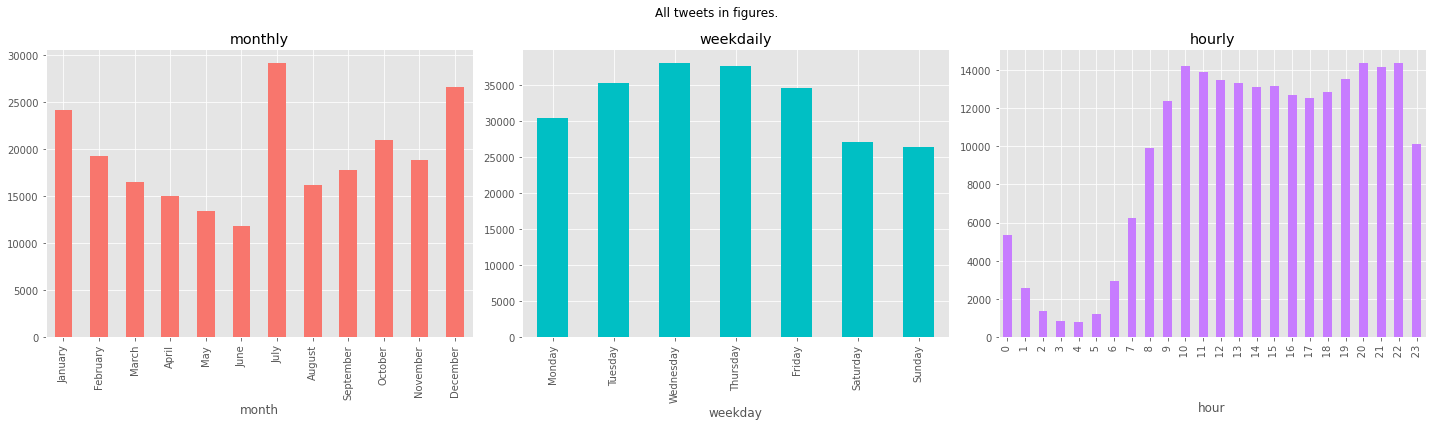

In [19]:
tweet_count_bars(df_mc, df_wdc, df_hc, save_file=SSA_CHART_DIR.replace('{}', 'tweet_count_bars'))

1. Most of tweets have come from months: september, october and november and the least from may.
2. Most of the tweets have been posted on Wednesday and the least on Saturday and Sunday.
3. Most of the tweets have been written around the midday (hours 10-13) and in the evening (hours 20, 21).

## Timeline amounts
---

In [20]:
df_dc

,all,count
date,,
2014-06-06,10.0,10.0
2014-06-07,7.0,7.0
2014-06-08,8.0,8.0
2014-06-09,15.0,15.0
2014-06-10,15.0,15.0
...,...,...
2020-05-11,152.0,152.0
2020-05-12,228.0,228.0
2020-05-13,234.0,234.0


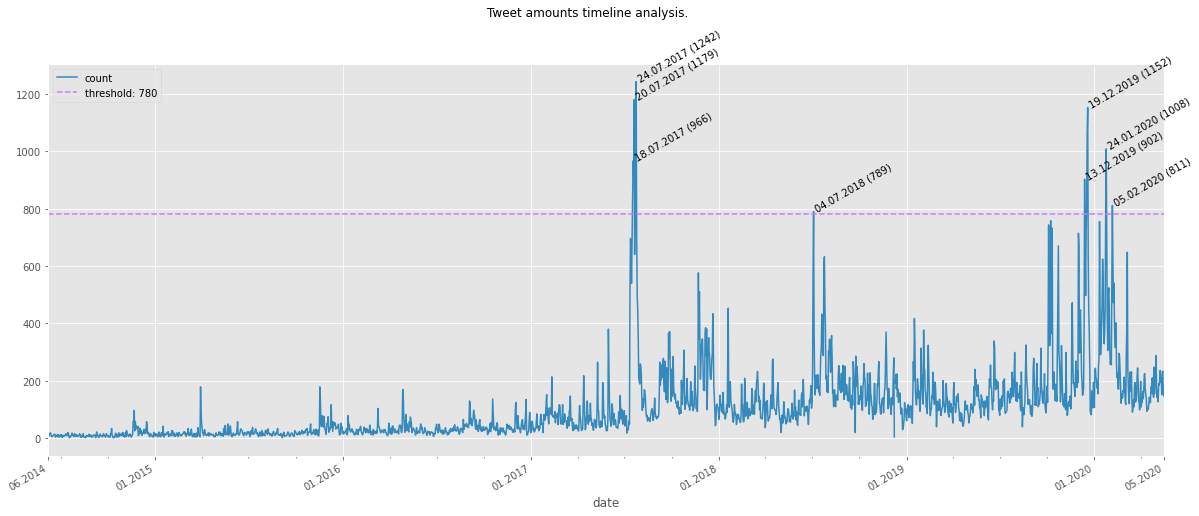

In [21]:
tweets_timeline(df_dc, empty_spaces=True, threshold=780,
                save_file=SSA_CHART_DIR.replace('{}', 'tweets_timeline'))

## Hate speech types analysis
---
* Monthly, weekdaily, hourly counts
* Timeline amounts (*have not been performed due to the lack of data*)
* Monthly amounts

**Wyzywanie**

In [22]:
df_yc, df_mc, df_wdc, df_hc, df_dc = get_stats(df_combined, hate_type='wyzywanie',
                                               month_names=MONTH_NAMES,
                                               weekday_names=WEEKDAY_NAMES)

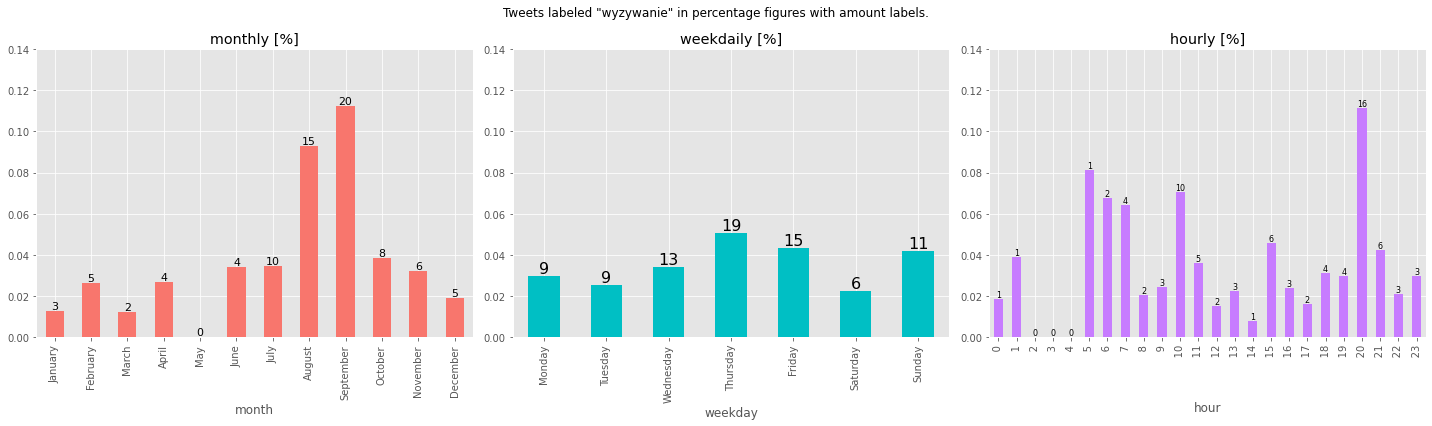

In [23]:
tweet_count_bars(df_mc, df_wdc, df_hc, thr=0.14,
                 title='Tweets labeled "wyzywanie" in percentage figures with amount labels.',
                 percentages=True, save_file=SSA_CHART_DIR.replace('{}', 'tweets_wyz_timeline'))

**Grożenie**

In [24]:
df_yc, df_mc, df_wdc, df_hc, df_dc = get_stats(df_combined, hate_type='grożenie',
                                               month_names=MONTH_NAMES,
                                               weekday_names=WEEKDAY_NAMES)

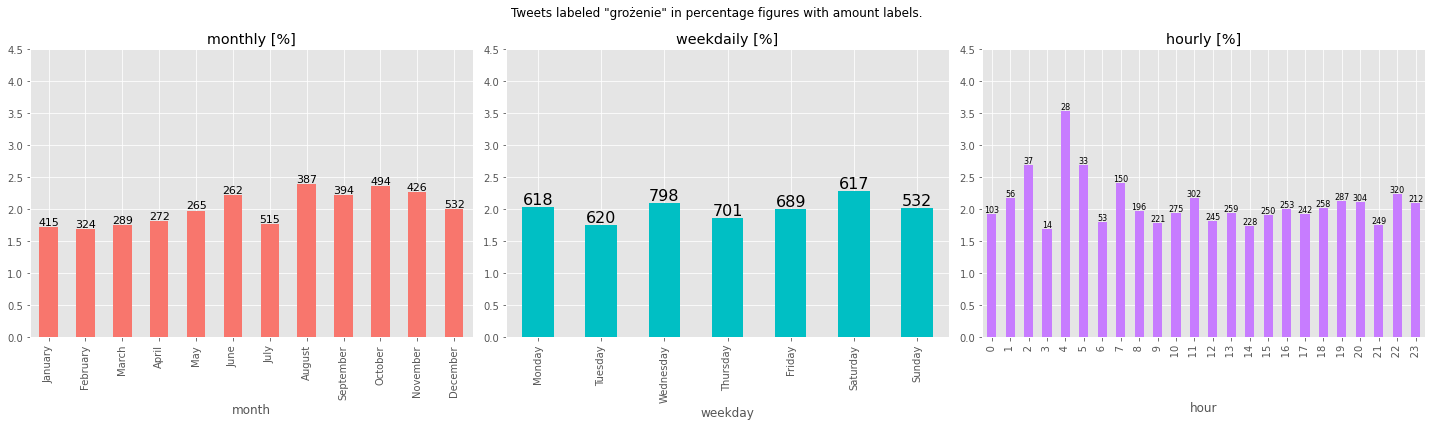

In [25]:
tweet_count_bars(df_mc, df_wdc, df_hc, thr=4.5,
                 title='Tweets labeled "grożenie" in percentage figures with amount labels.',
                 percentages=True, save_file=SSA_CHART_DIR.replace('{}', 'tweets_groz_timeline'))

**Wykluczanie**

In [26]:
df_yc, df_mc, df_wdc, df_hc, df_dc = get_stats(df_combined, hate_type='wykluczanie',
                                               month_names=MONTH_NAMES,
                                               weekday_names=WEEKDAY_NAMES)

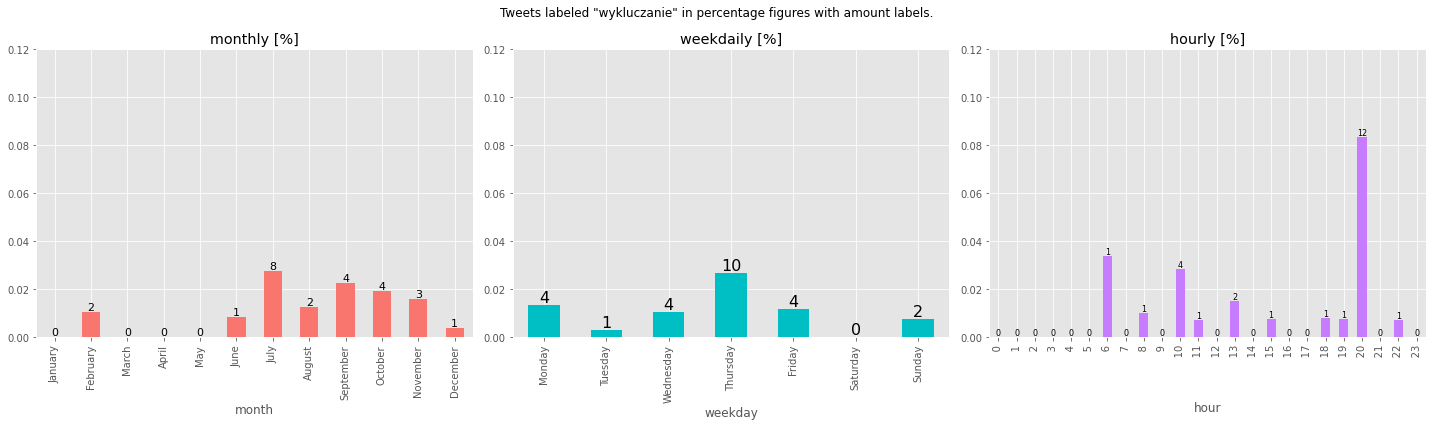

In [27]:
tweet_count_bars(df_mc, df_wdc, df_hc, thr=0.12,
                 title='Tweets labeled "wykluczanie" in percentage figures with amount labels.',
                 percentages=True, save_file=SSA_CHART_DIR.replace('{}', 'tweets_wyk_timeline'))

**Odczłowieczanie**

In [28]:
df_yc, df_mc, df_wdc, df_hc, df_dc = get_stats(df_combined, hate_type='odczłowieczanie',
                                               month_names=MONTH_NAMES,
                                               weekday_names=WEEKDAY_NAMES)

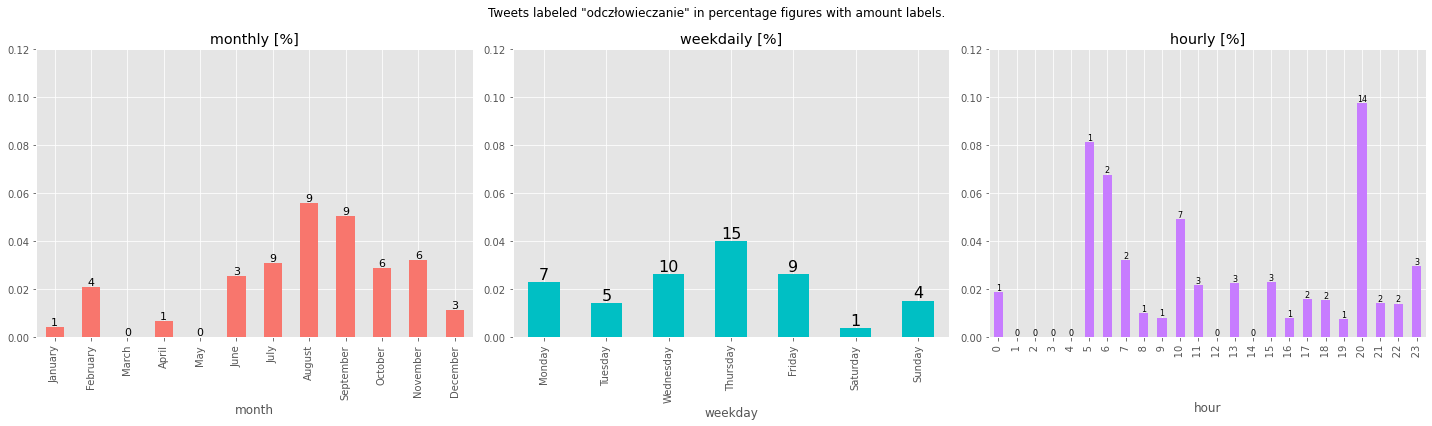

In [29]:
tweet_count_bars(df_mc, df_wdc, df_hc, thr=0.12,
                 title='Tweets labeled "odczłowieczanie" in percentage figures with amount labels.',
                 percentages=True, save_file=SSA_CHART_DIR.replace('{}', 'tweets_odcz_timeline'))

**Poniżanie**

In [30]:
df_yc, df_mc, df_wdc, df_hc, df_dc = get_stats(df_combined, hate_type='poniżanie',
                                               month_names=MONTH_NAMES,
                                               weekday_names=WEEKDAY_NAMES)

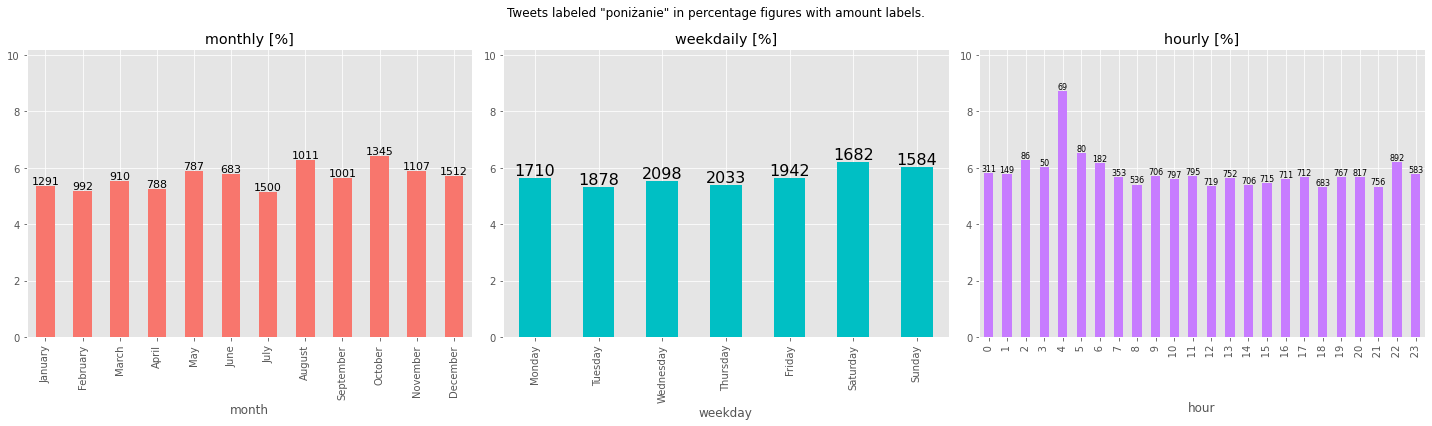

In [31]:
tweet_count_bars(df_mc, df_wdc, df_hc, thr=10.2,
                 title='Tweets labeled "poniżanie" in percentage figures with amount labels.',
                 percentages=True, save_file=SSA_CHART_DIR.replace('{}', 'tweets_pon_timeline'))

**Stygmatyzacja**

In [32]:
df_yc, df_mc, df_wdc, df_hc, df_dc = get_stats(df_combined, hate_type='stygmatyzacja',
                                               month_names=MONTH_NAMES,
                                               weekday_names=WEEKDAY_NAMES)

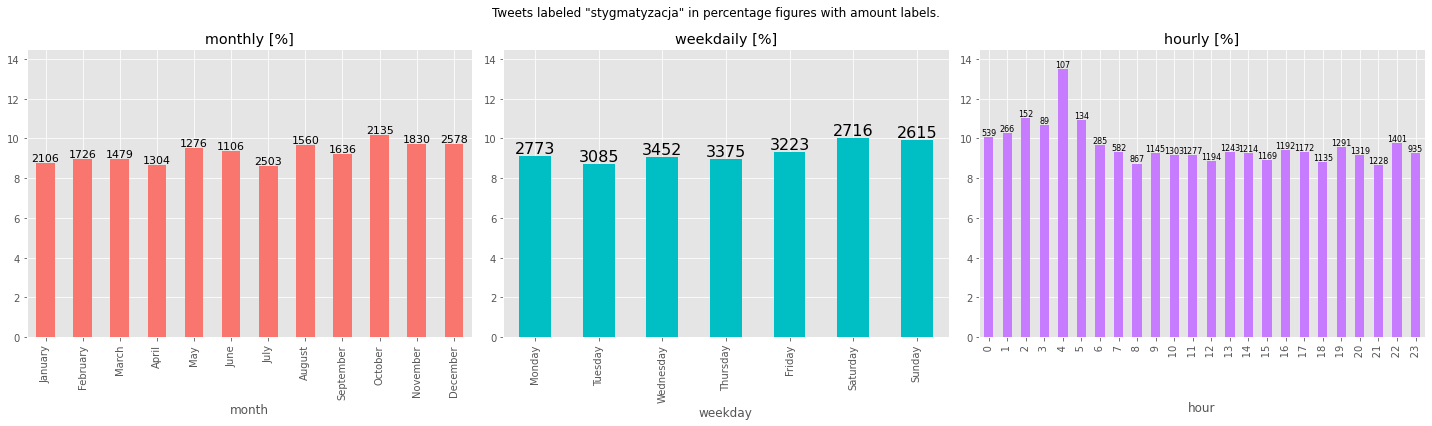

In [33]:
tweet_count_bars(df_mc, df_wdc, df_hc, thr=14.5,
                 title='Tweets labeled "stygmatyzacja" in percentage figures with amount labels.',
                 percentages=True, save_file=SSA_CHART_DIR.replace('{}', 'tweets_styg_timeline'))

**Szantaż**

In [34]:
df_yc, df_mc, df_wdc, df_hc, df_dc = get_stats(df_combined, hate_type='szantaż',
                                               month_names=MONTH_NAMES,
                                               weekday_names=WEEKDAY_NAMES)

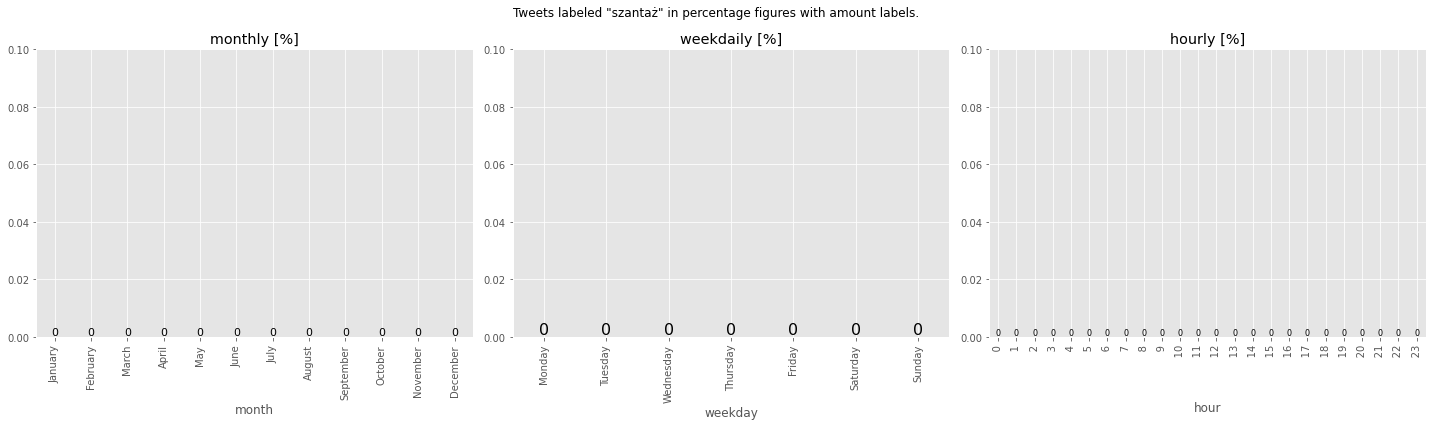

In [35]:
tweet_count_bars(df_mc, df_wdc, df_hc, thr=0.1,
                 title='Tweets labeled "szantaż" in percentage figures with amount labels.',
                 percentages=True, save_file=SSA_CHART_DIR.replace('{}', 'tweets_szan_timeline'))

Model could not detect any "szantaż" labels due to the insufficient amount of training data!

## Year-monthly amounts
---

In [36]:
df_ymc = get_monthly_stats(df_combined)
df_ymc.head()

,all,wyzywanie,grożenie,wykluczanie,odczłowieczanie,poniżanie,stygmatyzacja,szantaż
2014-06,249.0,2.0,8.0,1.0,1.0,20.0,34.0,0.0
2014-07,311.0,1.0,17.0,0.0,0.0,32.0,46.0,0.0
2014-08,240.0,6.0,14.0,1.0,5.0,24.0,35.0,0.0
2014-09,284.0,11.0,30.0,4.0,5.0,39.0,50.0,0.0
2014-10,318.0,1.0,20.0,0.0,1.0,30.0,35.0,0.0


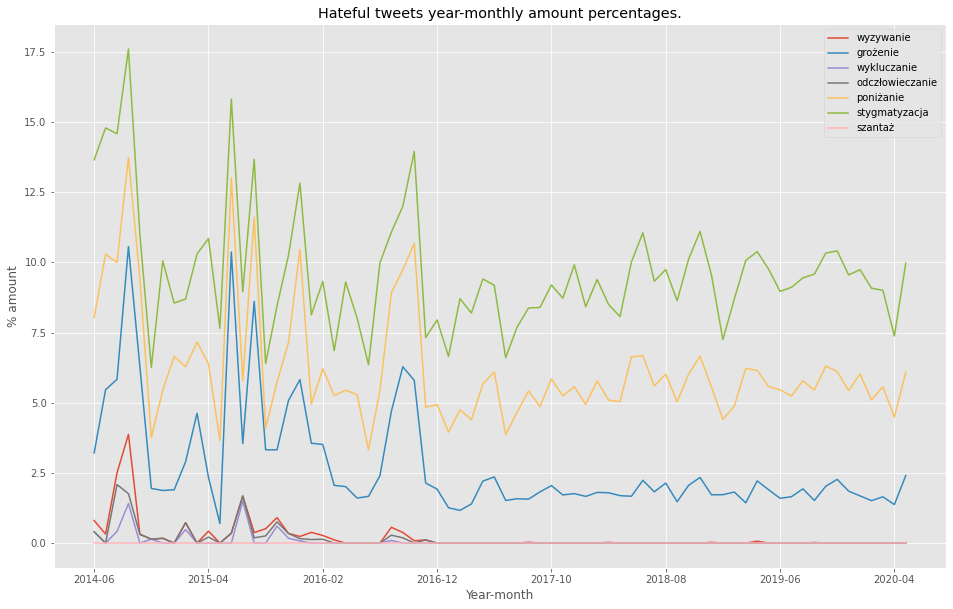

In [37]:
monthly_hateful_amount_lines(df_ymc,
                             title='Hateful tweets year-monthly amount percentages.',
                             save_file=SSA_CHART_DIR.replace('{}','tweet_ym_amounts_lines'))

## Tweets hate type popularity
---
* Likes
* Retweets
* Replies

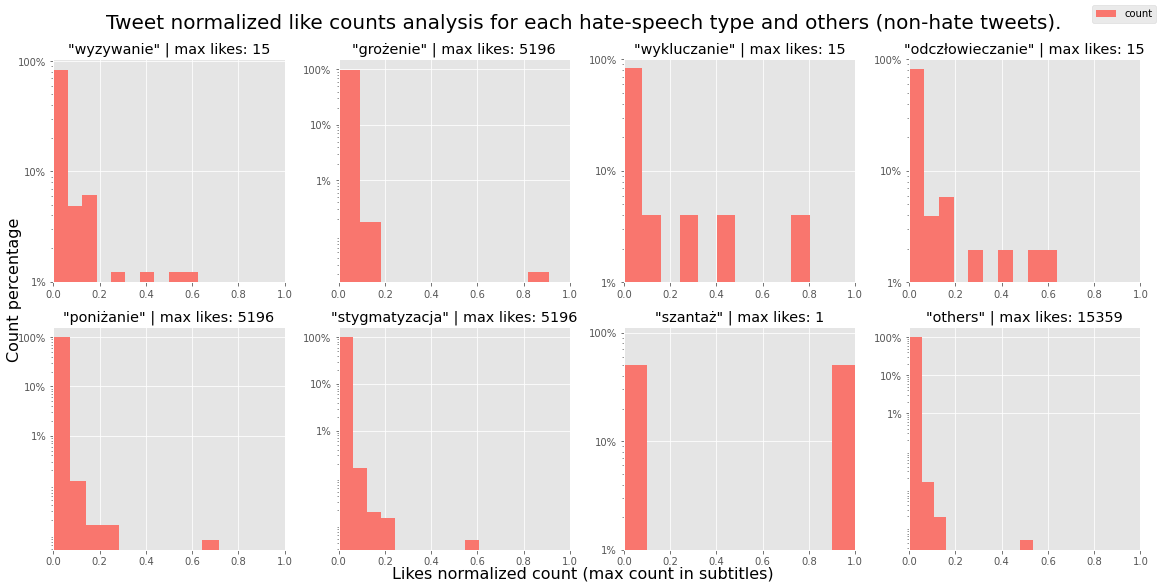

In [38]:
popularity_hists(df_combined, attribute='likes', color='#f9766e',
                 save_file=SSA_CHART_DIR.replace('{}', 'like_counts_hists'))

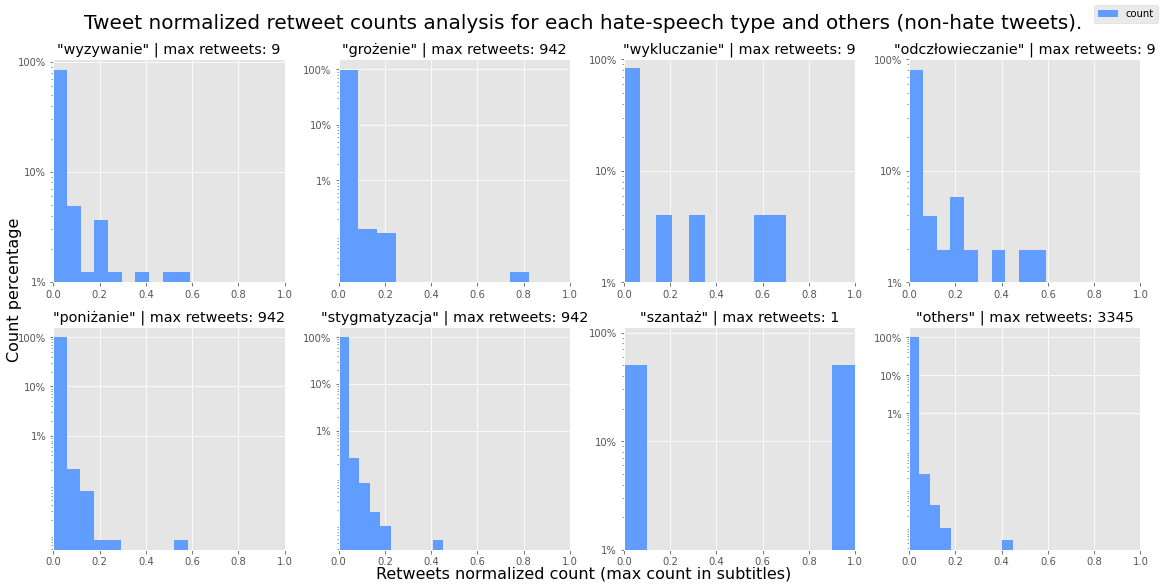

In [39]:
popularity_hists(df_combined, attribute='retweets', color='#619dff',
                 save_file=SSA_CHART_DIR.replace('{}', 'retweet_counts_hists'))

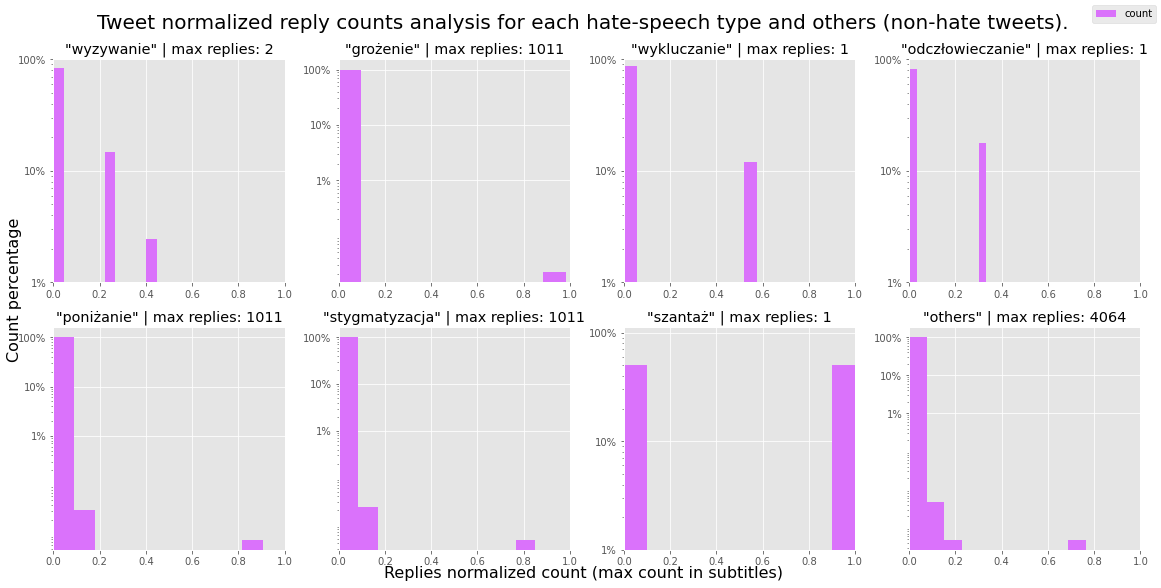

In [40]:
popularity_hists(df_combined, attribute='replies', color='#da72fb',
                 save_file=SSA_CHART_DIR.replace('{}', 'replies_counts_hists'))

## All data quantitive year-monthly analysis

In [41]:
df_all_dates = df_combined[['date', 'time']]
df_all_dates

,date,time
0,2014-06-06,08:25:42
1,2014-06-06,09:40:53
2,2014-06-06,09:48:23
3,2014-06-06,10:04:05
4,2014-06-06,13:11:09
...,...,...
229388,2020-05-16,23:31:36
229389,2020-05-16,23:37:45
229390,2020-05-16,23:52:46
229391,2020-05-16,23:52:56


In [42]:
df_ymall = get_monthly_stats(df_all_dates, labeled=False)
df_ymall

,all
2014-06,249
2014-07,311
2014-08,240
2014-09,284
2014-10,318
...,...
2020-01,12548
2020-02,8601
2020-03,5764
2020-04,4812


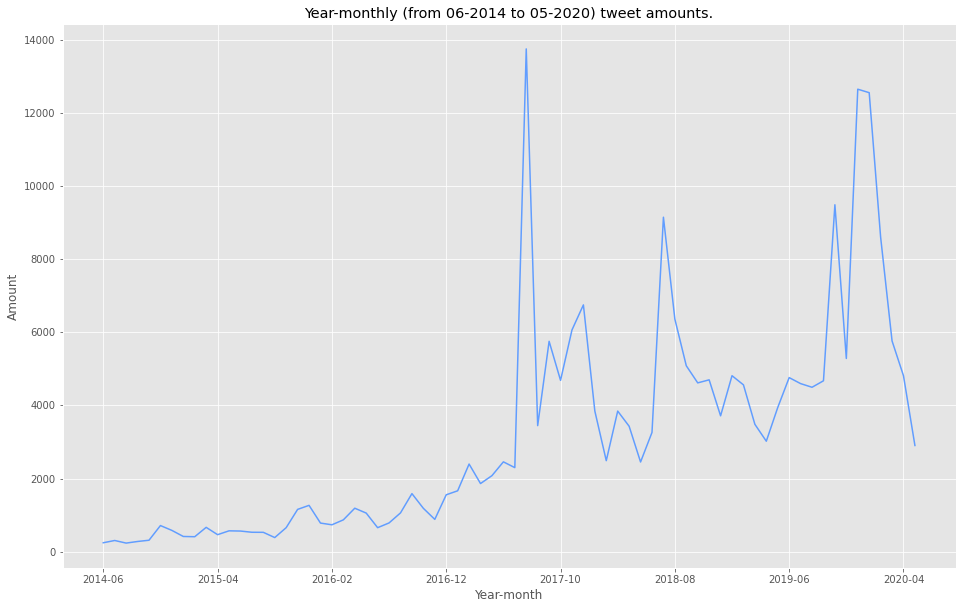

In [43]:
monthly_amount_line(df_ymall,
                    title='Year-monthly (from 06-2014 to 05-2020) tweet amounts.',
                    save_file=SSA_CHART_DIR.replace('{}', 'all_ym_tweet_amounts_lines'))

## All tweet word counts analysis

In [44]:
df_ymwc = monthly_word_counts(df_combined)
df_ymwc

,word count
year-month,
2014-06,16.0
2014-07,15.0
2014-08,15.0
2014-09,16.0
2014-10,15.0
...,...
2020-01,28.0
2020-02,26.0
2020-03,22.0


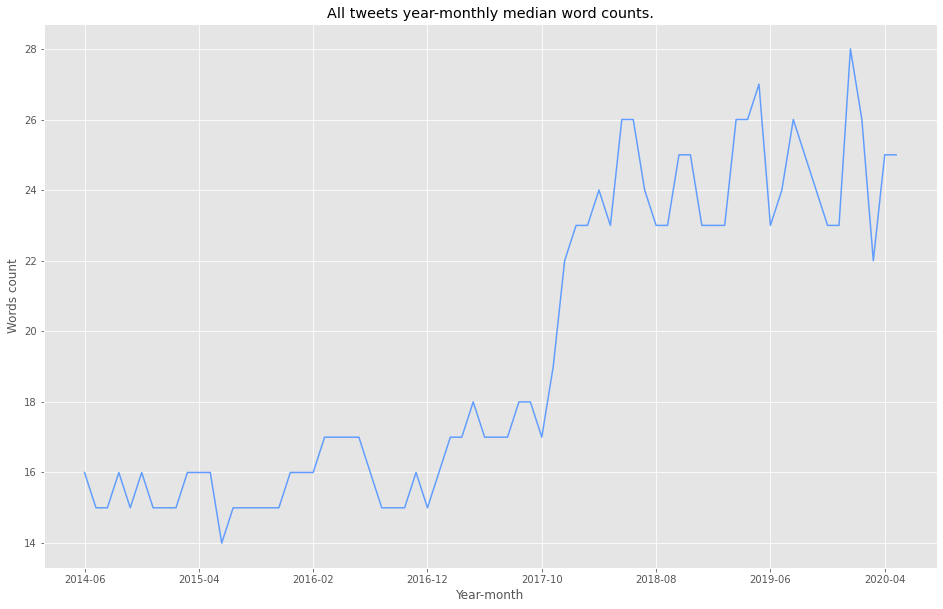

In [45]:
monthly_word_count_line(df_ymwc, title='All tweets year-monthly median word counts.',
                        save_file=SSA_CHART_DIR.replace('{}', 'all_ym_tweet_wordcounts_lines'))